## Dạng hàm phân phối

Phân phối bao gồm: Cauchy, Gamma, Exponential, Log-Logistic, Log-Normal Hàm mât đô xác suất (PDF) của phân phối Cauchy:

$$
f\left(x ; x_{0} ; \gamma\right)=\frac{1}{\pi \gamma\left[1+\left(\frac{x-x_{0}}{\gamma}\right)^{2}\right]}=\frac{1}{\pi \gamma}\left[\frac{\gamma^{2}}{\left(x-x_{0}\right)^{2}+\gamma^{2}}\right]
$$

Trong đó:

- $x_{0}$ : là thông số vị trí, chỉ định vị trí đỉnh của phân phối
- $\gamma$ : là thông số tỷ lệ chỉ định nửa chiều rộng ở nửa tối đa (HWHM), $2 \gamma$ là toàn bộ chiều rộng ở mức tối đa một nửa (FWHM). $\gamma$ là một nửa phạm vi liên phần và đôi khi được gọi là lỗi có thể xảy ra

Hàm mât đô xác suất (PDF) của phân phối Gamma:

$$
f(x ; k ; \theta)=\frac{x^{k-1} e^{-\frac{x}{\theta}}}{\theta^{k} \Gamma(k)}, \text { for } x>0 \text { and } k, \theta>0
$$

- $k$ : là tham số hình dạng
- $\theta$ : là tham số tỷ lệ
- $x$ : là biến ngẫu nhiên
- $\Gamma(k)$ : là hàm gamma được đánh giá tại $\mathrm{k}$

Hàm mật đô xác suất (PDF) của phân phối Exponential:

$$
f(x ; \lambda)=\left\{\begin{array}{rr}
0, & x<0 \\
\lambda e^{-\lambda x}, & x \geq 0
\end{array}\right.
$$

- $\lambda$ : là tham số của phân phối, thường được gọi là tham số tỷ lệ.
- $x$ : là biến ngẫu nhiên

Hàm mật độ xác suất (PDF) của phân phối Log-Logistic:

$$
f(x ; \alpha ; \beta)=\frac{\left(\frac{\beta}{\alpha}\right)\left(\frac{x}{\alpha}\right)^{\beta-1}}{\left(1+\left(\frac{x}{\alpha}\right)^{\beta}\right)^{2}}, \text { where } x>0, \alpha>0, \beta>0
$$

- $\alpha$ : là tham số tỷ lệ và là giá trị trung bình của phân phối
- $\beta$ : là tham số hình dạng

Hàm mât độ xác suất (PDF) của phân phối Lognormal $\left(\mu, \sigma^{2}\right)$ :

$$
f_{x}(x)=\frac{d}{d x} \operatorname{Pr}(X \leq x)=\frac{1}{x \sigma \sqrt{2 \pi}} e^{\left(-\frac{(\ln x-\mu)^{2}}{2 \sigma^{2}}\right)}, \text { where } x>0, \sigma>0
$$

- $x$ là biến ngẫu nhiên 
- Một biến ngẫu nhiên $X$ tuân theo phân phối Log-normal $\left(X \sim \operatorname{Lognormal}\left(\mu_{x}, \sigma_{x}^{2}\right)\right)$ nếu $\ln (X)$ tuân theo phân phối chuẩn với giá trị trung bình là $\mu$ và phương sai $\sigma^{2}$

Để lựa chọn phân phối phù hợp cho từng phân nhóm, Nhóm mô hình lựa chọn mô hình có SSE (Sum of square error - tổng của sai số bình phương) nhỏ nhất với SSE được tính theo công thức sau:

$$
\left.S S E=\sum \text { (Giá trị thực tế - Giá trị được tính ra từ mô hình phân phối }\right)^{2}
$$

Cuối cùng, từ mô hình phân phối vừa được lựa chọn (là mô hình có SSE nhỏ nhất).

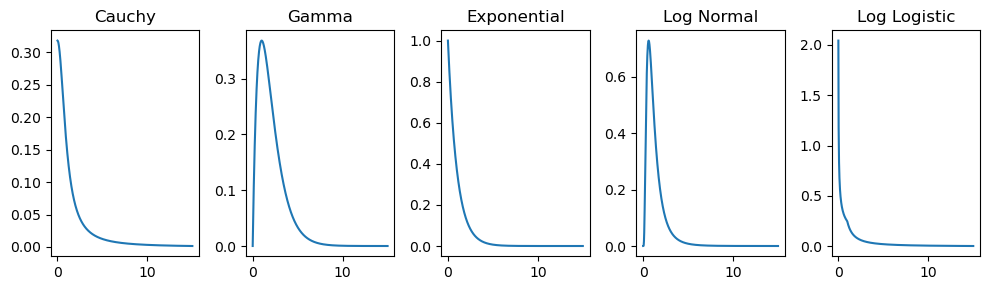

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, gamma, expon, lognorm, loglaplace

# Define the x range for the plot
x = np.linspace(0, 15, 1000)

# Create a single row with 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(10, 3))

# Cauchy Distribution
cauchy_pdf = cauchy.pdf(x)
axs[0].plot(x, cauchy_pdf)
axs[0].set_title("Cauchy")

# Gamma Distribution
gamma_pdf = gamma.pdf(x, a=2)
axs[1].plot(x, gamma_pdf)
axs[1].set_title("Gamma")

# Exponential Distribution
exponential_pdf = expon.pdf(x)
axs[2].plot(x, exponential_pdf)
axs[2].set_title("Exponential")

# Log Normal Distribution
log_normal_pdf = lognorm.pdf(x, s=0.7)
axs[3].plot(x, log_normal_pdf)
axs[3].set_title("Log Normal")

# Log Logistic Distribution
log_logistic_pdf = loglaplace.pdf(x, c=0.5)
axs[4].plot(x, log_logistic_pdf)
axs[4].set_title("Log Logistic")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Python Example

In [1]:
import numpy as np
import pandas as pd
import scipy  
from scipy import stats 
import scipy.optimize as optimize

### 1. Các hàm liên quan

#### 1.1 Hàm phân phối gamma

In [1]:
class opt_gamma:

    def __init__(self, actual_pd):
        self.actual_pd = actual_pd
        self.x_input = range(1, len(actual_pd) + 1)

    def func(self, x, scale, a, b):        
        predict = stats.gamma.pdf(x, a = a, scale = b) * scale
        return predict

    def sse(self, params, xobs, yobs):
        ynew = self.func(xobs, *params)
        mse = np.sum((ynew - yobs) ** 2)        
        return mse
    
    def solver(self):
        p0 = [1,1,1]
        bounds = [(0.0001, 2), (0.0001, 10), (0.0001, 10)]
        res = scipy.optimize.minimize(self.sse, p0, args=(self.x_input, self.actual_pd), bounds= bounds)       
        # res = scipy.optimize.minimize(self.sse, p0, args=(self.x_input, self.actual_pd), method='Nelder-Mead')        
        return res
    
    def predict(self, t=30):
        res = self.solver()
        ypred = self.func(range(1, t+1), *res.x)        
        return ypred        

#### 1.2 Hàm Phân phối mũ Exponential

In [3]:
class opt_exponential:

    def __init__(self, actual_pd):
        self.actual_pd = actual_pd
        self.x_input = range(1, len(actual_pd) + 1)

    def func(self, x, scale, a):        
        # change function here        
        pred = stats.expon.pdf(x, scale = 1/a) * scale
        return pred

    def sse(self, params, xobs, yobs):
        ynew = self.func(xobs, *params)
        mse = np.sum((ynew - yobs) ** 2)        
        return mse
    
    def solver(self):
        # change initial guess here
        p0 = [1,2]
        bounds = [(0.0001, 2), (0.0001, 0.5)]           
        res = scipy.optimize.minimize(self.sse, p0, args=(self.x_input, self.actual_pd), bounds = bounds)             
        return res
    
    def predict(self, t=30):
        res = self.solver()
        ypred = self.func(range(1, t+1), *res.x)        
        return ypred       

#### 1.3 Hàm phân phối Cauchy

In [4]:
class opt_cauchy:

    def __init__(self, actual_pd):
        self.actual_pd = actual_pd
        self.x_input = range(1, len(actual_pd) + 1)

    def func(self, x, scale, a, b):        
        # change function here        
        predict = stats.cauchy.pdf(x, loc = b, scale = a) * scale
        return predict

    def sse(self, params, xobs, yobs):
        ynew = self.func(xobs, *params)
        mse = np.sum((ynew - yobs) ** 2)        
        return mse
    
    def solver(self):
        # change initial guess here
        p0 = [1,1,1]
        bounds = [(0.0001, 2), (0.0001, 15), (-30, 30)]
        res = scipy.optimize.minimize(self.sse, p0, args=(self.x_input, self.actual_pd), bounds = bounds)        
        return res
    
    def predict(self, t=30):
        res = self.solver()
        ypred = self.func(range(1, t+1), *res.x)        
        return ypred    

#### 1.4 Hàm phân phối log logistic

In [5]:
class opt_log_logistic:

    def __init__(self, actual_pd):
        self.actual_pd = actual_pd
        self.x_input = range(1, len(actual_pd) + 1)

    def func(self, x, scale, a, b):        
        # change function here
        predict = scale*(a/b)*(x/b)**(a-1)/(1+(x/b)**a)**2
        return predict

    def sse(self, params, xobs, yobs):
        ynew = self.func(xobs, *params)
        mse = np.sum((ynew - yobs) ** 2)        
        return mse
    
    def solver(self):
        # change initial guess here
        p0 = [2,3,1]
        bounds = [(0.0001, 2), (0.0001, 10), (0.0001, 10)]
        res = scipy.optimize.minimize(self.sse, p0, args=(self.x_input, self.actual_pd), bounds=bounds)        
        return res
    
    def predict(self, t=30):
        res = self.solver()
        ypred = self.func(range(1, t+1), *res.x)        
        return ypred    

#### 1.5 Hàm phân phối log normal

In [6]:
class opt_log_normal:

    def __init__(self, actual_pd):
        self.actual_pd = actual_pd
        self.x_input = range(1, len(actual_pd) + 1)

    def func(self, x, scale, a, b):        
        # change function here
        predict = (np.exp(-(np.log(x) - a)**2 / (2 * b**2)) / (x * b * np.sqrt(2 * np.pi)))*scale
        return predict

    def sse(self, params, xobs, yobs):
        ynew = self.func(xobs, *params)
        mse = np.sum((ynew - yobs) ** 2)        
        return mse
    
    def solver(self):
        # change initial guess here
        p0 = [1,1,1]
        bounds = [(0.0001, 2), (0.0001, 0.5), (0.0001, 0.5)]
        res = scipy.optimize.minimize(self.sse, p0, args=(self.x_input, self.actual_pd), bounds=bounds)        
        return res
    
    def predict(self, t=30):
        res = self.solver()
        ypred = self.func(range(1, t+1), *res.x)        
        return ypred    

## 2. Fit models

### 2.1 Đặt giá trị initial

- Gamma = 1,1,1

- Cauchy = 1,1,1

- Expo = 1,2

- Log Logistic = 2,3,1

- Log Normal = 1,1,1

### 2.2 Đọc dữ liệu

In [ ]:
data = pd.read_excel('results/Cohort Analysis.xlsb', engine='pyxlsb', sheet_name='1.2 Visualize', usecols = 'O:Z')
data.tail()

## 2.3 Fit models

In [9]:
def fn_export_by_segment(segment, period):
    # segment = segment.upper()
    actual_pd = data[data.Segment_Group.isin([segment])]
    actual_pd = actual_pd.iloc[0, 2:]
    actual_pd = actual_pd.values
    
    res_gamma = opt_gamma(actual_pd)
    res_exponential = opt_exponential(actual_pd)
    res_cauchy = opt_cauchy(actual_pd)
    res_log_logistic = opt_log_logistic(actual_pd)
    res_log_normal = opt_log_normal(actual_pd)
    
    params = pd.DataFrame({
        'Segment': segment,
        'Distribution': ['Gamma', 'Exponential', 'Cauchy', 'Log-Logistic', 'Log-Normal'],
        'SSE': [res_gamma.solver().fun, res_exponential.solver().fun, res_cauchy.solver().fun, res_log_logistic.solver().fun, res_log_normal.solver().fun],
        'params': [res_gamma.solver().x, res_exponential.solver().x, res_cauchy.solver().x, res_log_logistic.solver().x, res_log_normal.solver().x]
    })    
   
    params[['scale', 'a', 'b']] = pd.DataFrame(params.params.to_list())    
    del params['params']
    
    dict_predict = {
            'Segment': segment,
            'Period': range(1, period+1),
            'Gamma': res_gamma.predict(period),
            'Exponential': res_exponential.predict(period),
            'Cauchy': res_cauchy.predict(period),
            'Log-Logistic': res_log_logistic.predict(period),
            'Log-Normal': res_log_normal.predict(period)
        }
    
    best_distribution = params.sort_values('SSE').head(1)
    best_distribution['Tag best distribution'] = 'Best distribution'    

    print('Best distribution of ' + segment + ' is '+ best_distribution['Distribution'].item())

    return params, best_distribution, pd.DataFrame(dict_predict)


In [ ]:
pred_best_fit = []
params_frame = []
pred_all_curve = []
for seg in data.Segment_Group:
    params, df_best_fit, df_all = fn_export_by_segment(seg, 30)
    pred_best_fit.append(df_best_fit)
    params_frame.append(params)
    pred_all_curve.append(df_all)

pred_best_fit = pd.concat(pred_best_fit, axis=0)
params_frame = pd.concat(params_frame, axis=0)
pred_all_curve = pd.concat(pred_all_curve, axis=0)

In [11]:
pivot_pred_all_curve = pd.melt(pred_all_curve, 
        id_vars=['Segment', 'Period'], 
        value_vars=['Gamma', 'Exponential', 'Cauchy', 'Log-Logistic', 'Log-Normal'],
        var_name = 'Distribution').pivot(
                index = ['Segment', 'Distribution'], columns='Period'
        )
pivot_pred_all_curve.reset_index(inplace=True, drop=False)
pivot_pred_all_curve.columns = ['Segment', 'Distribution', *range(1,31)]
pivot_pred_all_curve = params_frame.merge(pivot_pred_all_curve, how='inner', on=['Segment', 'Distribution']).merge(
        pred_best_fit[['Segment', 'Distribution', 'Tag best distribution']], how='left', on=['Segment', 'Distribution']
)

# Xuất OutPut ra Excel

In [136]:
pred_best_fit.reset_index(inplace=True, drop=True)
params_frame.reset_index(inplace=True, drop=True)
pivot_pred_all_curve.reset_index(inplace=True, drop=True)
with pd.ExcelWriter('cohort_fitted.xlsx') as writer:
    pred_best_fit.to_excel(writer, sheet_name='pred_best_fit')
    params_frame.to_excel(writer, sheet_name='params_frame')        
    pivot_pred_all_curve.to_excel(writer, sheet_name='pivot_pred_all_curve')